In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
#import data, make copy
data_ori = pd.read_excel(r'/Users/carrie/Downloads/3-Bank Deposit.xlsx')
data = data_ori

#have a general ideal of the data set
data.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Bank deposit(target)
0,95,retired,divorced,primary,no,2282.0,no,no,telephone,21.0,apr,207.0,17.0,-1.0,0.0,unknown,yes
1,95,retired,married,secondary,no,0.0,no,no,telephone,1.0,oct,215.0,1.0,-1.0,0.0,unknown,no
2,94,retired,divorced,secondary,no,1234.0,no,no,cellular,3.0,mar,212.0,1.0,-1.0,0.0,unknown,no
3,93,retired,married,unknown,no,775.0,no,no,cellular,22.0,jul,860.0,2.0,177.0,7.0,success,yes
4,93,retired,married,unknown,no,775.0,no,no,cellular,4.0,aug,476.0,2.0,13.0,9.0,success,yes


In [3]:
#check dtype for cols
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11222 entries, 0 to 11221
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   11222 non-null  int64  
 1   job                   11222 non-null  object 
 2   marital               11216 non-null  object 
 3   education             11195 non-null  object 
 4   default               11216 non-null  object 
 5   balance               11216 non-null  float64
 6   housing               11216 non-null  object 
 7   loan                  11210 non-null  object 
 8   contact               11216 non-null  object 
 9   day                   11216 non-null  float64
 10  month                 11214 non-null  object 
 11  duration              11214 non-null  float64
 12  campaign              11214 non-null  float64
 13  pdays                 11214 non-null  float64
 14  previous              11216 non-null  float64
 15  poutcome           

In [4]:
#check missing data in every col
data.isnull().sum()

age                      0
job                      0
marital                  6
education               27
default                  6
balance                  6
housing                  6
loan                    12
contact                  6
day                      6
month                    8
duration                 8
campaign                 8
pdays                    8
previous                 6
poutcome                 0
Bank deposit(target)     0
dtype: int64

In [5]:
#data.describe()
desc = pd.DataFrame(data.describe(), dtype=np.int64)
desc

,age,balance,day,duration,campaign,pdays,previous
count,11222,11216,11216,11214,11214,11214,11216
mean,56,7966,15,2040,2,35,0
std,6,642145,8,188861,2,90,1
min,50,-4057,1,0,1,-1,0
25%,52,108,8,102,1,-1,0
50%,55,627,16,176,2,-1,0
75%,58,2031,21,316,3,-1,0
max,95,68000000,31,20000000,43,792,37


## Numeric cols
### age: 
check max value, 95 year old outlier maybe
### balance: 
-min: negative balance: drop rows of balance less than -1000, since they might have some money elsewhere 
-max: check outlier 
### day: 
nothing wierd, but consider not important in the future analysis, so we will drop it
=> but we will keep the month col, to see if there is any seasonal pattern for the subscription a term deposit
### duration:
we interpret 0 as the client didn't pick up the call, so we keep everthing, since in our opinion it's not the key factor for poutcome
### campaign:
group by campagne, condition campagne > 10, to count the poutcome yes, decide to keep or drop those rows
### pdays
keep
### previous 
very low variance, drop the col

## Non-numeric cols
### contact
drop empty values + ghjk

### for other non numerical columns
to replace none value in non-numerical col by the mode \
price_median_value = round(airbnb[‘price’].median(), 2) \
airbnb[‘price’].fillna(price_median_value, inplace=True)

<AxesSubplot:>

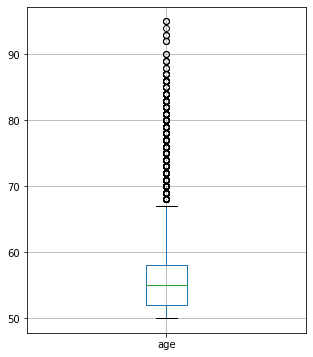

In [6]:
#check for age outlier:
plt.figure(figsize=(5, 6))
data.boxplot(column=['age'])

In [7]:
# age col: we drop the outlier (max)

#data.loc[data['age']!=data['age'].max()]
data = data.drop(data['age'].idxmax())

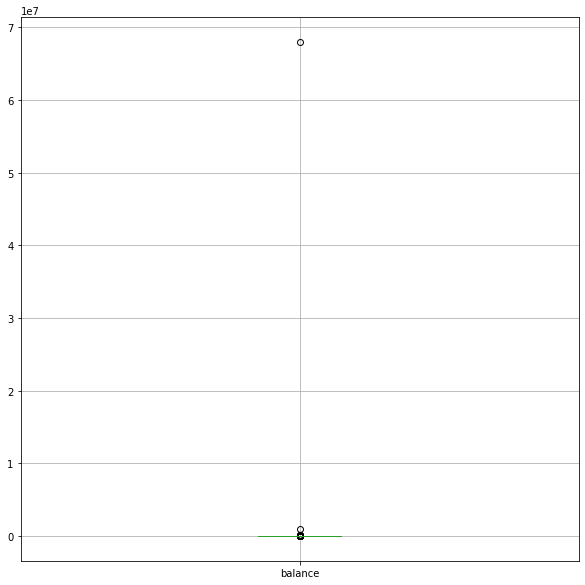

In [8]:
# balance col: 
#max: check outlier 
plt.figure(figsize=(10, 10))
data.boxplot(column=['balance'])
# -> we would drop the outlier (max)
#data.loc[data['balance']!=data['balance'].max()]
data = data.drop(data['balance'].idxmax())

In [9]:
#check if both max are droped
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11220.000000,11214.000000,11214.000000,1.121200e+04,11212.000000,11212.000000,11214.000000
mean,56.405793,1904.343053,15.785447,2.040987e+03,2.736354,35.116215,0.558766
std,6.128111,10293.381331,8.336839,1.888788e+05,2.851460,90.782356,1.741340
min,50.000000,-4057.000000,1.000000,0.000000e+00,1.000000,-1.000000,0.000000
25%,52.000000,108.000000,8.000000,1.020000e+02,1.000000,-1.000000,0.000000
50%,55.000000,627.000000,16.000000,1.760000e+02,2.000000,-1.000000,0.000000
75%,58.000000,2029.250000,21.000000,3.160000e+02,3.000000,-1.000000,0.000000
max,95.000000,1000000.000000,31.000000,2.000000e+07,43.000000,792.000000,37.000000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11220 entries, 1 to 11221
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   11220 non-null  int64  
 1   job                   11220 non-null  object 
 2   marital               11214 non-null  object 
 3   education             11193 non-null  object 
 4   default               11214 non-null  object 
 5   balance               11214 non-null  float64
 6   housing               11214 non-null  object 
 7   loan                  11208 non-null  object 
 8   contact               11214 non-null  object 
 9   day                   11214 non-null  float64
 10  month                 11212 non-null  object 
 11  duration              11212 non-null  float64
 12  campaign              11212 non-null  float64
 13  pdays                 11212 non-null  float64
 14  previous              11214 non-null  float64
 15  poutcome           

In [11]:
#campaign col:   campaign > 10, poutcome = unknow : drop those rows
#data = data.drop(data[(data.campaign >= 10) & (data.poutcome == 'unknown')],axis=1)

data.drop(data.loc[(data['campaign']>=10) & (data['poutcome'] == 'unknown')].index, inplace = True)

In [12]:
data[['campaign','poutcome']].value_counts()

campaign  poutcome
1.0       unknown     3318
2.0       unknown     2520
3.0       unknown     1144
4.0       unknown      835
1.0       failure      581
5.0       unknown      386
2.0       failure      322
6.0       unknown      314
1.0       success      261
7.0       unknown      170
1.0       other        149
8.0       unknown      134
2.0       success      130
3.0       failure      101
2.0       other         97
9.0       unknown       63
4.0       failure       61
3.0       other         51
          success       50
5.0       failure       30
4.0       other         28
6.0       failure       25
5.0       other         22
4.0       success       18
7.0       failure       16
6.0       other         11
5.0       success       11
8.0       other          6
6.0       success        6
7.0       other          5
          success        3
8.0       failure        3
9.0       other          3
8.0       success        2
9.0       failure        2
11.0      other          2
9.0      

In [13]:
# balance: 
# negative balance: drop rows of balance less than -1000
#data3 = data[(data.balance <= -1000)]
#data3
data.drop(data.loc[(data['balance']<= -1000)].index, inplace = True)

In [14]:
data['balance'].describe()

count      10850.000000
mean        1929.002120
std        10447.795859
min         -997.000000
25%          116.000000
50%          639.000000
75%         2051.500000
max      1000000.000000
Name: balance, dtype: float64

In [15]:
# previous col: drop
data.drop('previous',axis=1, inplace=True)

In [16]:
#Contact col: drop empty values 
data['contact'].dropna(inplace=True)

In [17]:
#Contact col: drop ghjk
data.drop(data[data.contact == 'ghjk'].index, inplace=True)

In [18]:
# for other non numerical columns: replace with mode 
for col in data[['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'Bank deposit(target)']]:
    data[col]=data[col].fillna(data[col].mode().iloc[0])
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,poutcome,Bank deposit(target)
1,95,retired,married,secondary,no,0.0,no,no,telephone,1.0,oct,215.0,1.0,-1.0,unknown,no
2,94,retired,divorced,secondary,no,1234.0,no,no,cellular,3.0,mar,212.0,1.0,-1.0,unknown,no
3,93,retired,married,unknown,no,775.0,no,no,cellular,22.0,jul,860.0,2.0,177.0,success,yes
4,93,retired,married,unknown,no,775.0,no,no,cellular,4.0,aug,476.0,2.0,13.0,success,yes
5,92,retired,married,unknown,no,775.0,no,no,cellular,22.0,oct,313.0,3.0,-1.0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11217,50,entrepreneur,divorced,tertiary,no,315.0,no,no,cellular,12.0,jul,101.0,2.0,185.0,failure,no
11218,50,management,married,tertiary,no,2881.0,no,no,cellular,5.0,aug,510.0,2.0,2.0,other,no
11219,50,technician,divorced,secondary,no,0.0,yes,no,cellular,13.0,aug,120.0,2.0,91.0,failure,no
11220,50,services,married,secondary,no,2376.0,yes,no,cellular,24.0,sep,395.0,1.0,-1.0,unknown,yes


In [19]:
#check if all nan value in non-numeric cols are well replaced
data.isnull().sum()

age                     0
job                     0
marital                 0
education               0
default                 0
balance                 6
housing                 0
loan                    0
contact                 0
day                     6
month                   0
duration                8
campaign                8
pdays                   8
poutcome                0
Bank deposit(target)    0
dtype: int64

In [20]:
#replace numeric col NaN with mean value 
for col in data[['balance', 'day', 'duration', 'campaign', 'pdays']]:
    data[col]=data[col].fillna(data[col].mean())

In [21]:
#check if all nan value in numeric cols are well replaced
data.isnull().sum()

age                     0
job                     0
marital                 0
education               0
default                 0
balance                 0
housing                 0
loan                    0
contact                 0
day                     0
month                   0
duration                0
campaign                0
pdays                   0
poutcome                0
Bank deposit(target)    0
dtype: int64

In [22]:
#check duplicate
data.duplicated().any()

True

In [23]:
#drop duplicated rows
data.drop_duplicates()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,poutcome,Bank deposit(target)
1,95,retired,married,secondary,no,0.0,no,no,telephone,1.0,oct,215.0,1.0,-1.0,unknown,no
2,94,retired,divorced,secondary,no,1234.0,no,no,cellular,3.0,mar,212.0,1.0,-1.0,unknown,no
3,93,retired,married,unknown,no,775.0,no,no,cellular,22.0,jul,860.0,2.0,177.0,success,yes
4,93,retired,married,unknown,no,775.0,no,no,cellular,4.0,aug,476.0,2.0,13.0,success,yes
5,92,retired,married,unknown,no,775.0,no,no,cellular,22.0,oct,313.0,3.0,-1.0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11215,50,technician,married,tertiary,no,0.0,no,yes,cellular,6.0,jul,257.0,1.0,85.0,failure,no
11217,50,entrepreneur,divorced,tertiary,no,315.0,no,no,cellular,12.0,jul,101.0,2.0,185.0,failure,no
11219,50,technician,divorced,secondary,no,0.0,yes,no,cellular,13.0,aug,120.0,2.0,91.0,failure,no
11220,50,services,married,secondary,no,2376.0,yes,no,cellular,24.0,sep,395.0,1.0,-1.0,unknown,yes


# Export clean data to csv.

In [24]:
data.to_csv(r'/Users/carrie/IronHack/W3_Project/cleandata.csv', index = False)

## Encoding

In [25]:
encoder = LabelEncoder()

In [26]:
data['poutcome'].value_counts()

unknown    8850
failure    1143
success     485
other       377
Name: poutcome, dtype: int64

In [27]:

#assign the encoder, replace cols with encoder
data['deposit_target_encode']=encoder.fit_transform(data['Bank deposit(target)'])

#drop the previous categorical col 
data2=data.drop(columns=['Bank deposit(target)'])
data2

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,poutcome,deposit_target_encode
1,95,retired,married,secondary,no,0.0,no,no,telephone,1.0,oct,215.0,1.0,-1.0,unknown,0
2,94,retired,divorced,secondary,no,1234.0,no,no,cellular,3.0,mar,212.0,1.0,-1.0,unknown,0
3,93,retired,married,unknown,no,775.0,no,no,cellular,22.0,jul,860.0,2.0,177.0,success,1
4,93,retired,married,unknown,no,775.0,no,no,cellular,4.0,aug,476.0,2.0,13.0,success,1
5,92,retired,married,unknown,no,775.0,no,no,cellular,22.0,oct,313.0,3.0,-1.0,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11217,50,entrepreneur,divorced,tertiary,no,315.0,no,no,cellular,12.0,jul,101.0,2.0,185.0,failure,0
11218,50,management,married,tertiary,no,2881.0,no,no,cellular,5.0,aug,510.0,2.0,2.0,other,0
11219,50,technician,divorced,secondary,no,0.0,yes,no,cellular,13.0,aug,120.0,2.0,91.0,failure,0
11220,50,services,married,secondary,no,2376.0,yes,no,cellular,24.0,sep,395.0,1.0,-1.0,unknown,1


In [28]:
cor = data2.corr()
cor
#SQL queries 1: group by age, average(balance), count(Bank deposit(target) = 'Yes')/count(Bank deposit(target))

,age,balance,day,duration,campaign,pdays,deposit_target_encode
age,1.000000,0.078508,-0.036488,0.043077,-0.076109,0.062329,0.258137
balance,0.078508,1.000000,-0.005544,0.072853,-0.016210,-0.003427,0.016278
day,-0.036488,-0.005544,1.000000,0.014292,0.136408,-0.060205,-0.014838
duration,0.043077,0.072853,0.014292,1.000000,-0.007820,0.028920,0.024437
campaign,-0.076109,-0.016210,0.136408,-0.007820,1.000000,-0.070762,-0.105161
pdays,0.062329,-0.003427,-0.060205,0.028920,-0.070762,1.000000,0.155373
deposit_target_encode,0.258137,0.016278,-0.014838,0.024437,-0.105161,0.155373,1.000000


In [30]:
#assumption: success in poutcome => more possibility to buy term deposit
poutcome_encode = {"failure":1, "other":2, "unknown":2, "success":3}
data["poutcome_rate"] = data["poutcome"].replace(poutcome_encode)
data4 = data[['deposit_target_encode','poutcome_rate']]

In [31]:
cor = data[['deposit_target_encode','poutcome_rate']].corr()
cor
#assumption: success in poutcome => more possibility to buy term deposit
#SQL queries 2: group by poutcome, count(Bank deposit(target) = 'Yes')/count(Bank deposit(target))

,deposit_target_encode,poutcome_rate
deposit_target_encode,1.000000,0.174403
poutcome_rate,0.174403,1.000000


In [32]:
data['loan'].value_counts()

no     9172
yes    1683
Name: loan, dtype: int64

In [33]:
#assumption: no loan => more possibility to buy term deposit
loan_encode = {"yes":0, "no":1}
data["loan_rate"] = data["loan"].replace(loan_encode)
data5 = data[['deposit_target_encode','loan_rate']]
data5

,deposit_target_encode,loan_rate
1,0,1
2,0,1
3,1,1
4,1,1
5,1,1
...,...,...
11217,0,1
11218,0,1
11219,0,1
11220,1,1


In [34]:
cor = data[['deposit_target_encode','loan_rate']].corr()
cor

,deposit_target_encode,loan_rate
deposit_target_encode,1.000000,0.094437
loan_rate,0.094437,1.000000


In [35]:
data['housing'].value_counts()

no     6660
yes    4195
Name: housing, dtype: int64

In [36]:
#assumption: no housing => more possibility to buy term deposit
housing_encode = {"yes":0, "no":1}
data["housing_rate"] = data["housing"].replace(housing_encode)
data6 = data[['deposit_target_encode','housing_rate']]
data6


,deposit_target_encode,housing_rate
1,0,1
2,0,1
3,1,1
4,1,1
5,1,1
...,...,...
11217,0,1
11218,0,1
11219,0,0
11220,1,0


In [37]:
cor = data[['deposit_target_encode','housing_rate']].corr()
cor
#SQL queries 3: group by house, count(Bank deposit(target) = 'Yes')/count(Bank deposit(target))

,deposit_target_encode,housing_rate
deposit_target_encode,1.000000,0.151816
housing_rate,0.151816,1.000000


In [38]:
#at the end of the year, there will be more opportunity for buying the deposit
data['month'].value_counts()

may    2372
aug    1824
jul    1734
jun    1503
nov    1064
feb     649
apr     581
jan     369
oct     318
sep     198
mar     165
dec      78
Name: month, dtype: int64

In [39]:
month_encode = {"jan":1, "feb":2,"mar":3,"apr":4,"may":5,"jun":6,"jul":7,"aug":8,"sep":9,"oct":10,"nov":12,"dec":12}
data["month_rate"] = data["month"].replace(month_encode)
data6 = data[['deposit_target_encode','month_rate']]
data6

,deposit_target_encode,month_rate
1,0,10
2,0,3
3,1,7
4,1,8
5,1,10
...,...,...
11217,0,7
11218,0,8
11219,0,8
11220,1,9


In [40]:
cor = data[['deposit_target_encode','month_rate']].corr()
cor

,deposit_target_encode,month_rate
deposit_target_encode,1.000000,-0.004724
month_rate,-0.004724,1.000000
